In [2]:
#coding:utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, accuracy_score, auc

D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 1、导入数据

In [3]:
# 读入CSV 命名为data
loan_LC = pd.read_csv('.\JN_DataWarehouse\ppdai\LC.csv')
loan_LC = loan_LC.set_index('ListingId')
loan_LC['借款成功日期'] = pd.to_datetime(loan_LC['借款成功日期'])
loan_LC.head()

,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
ListingId,,,,,,,,,,,,,,,,,,,,
126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [4]:
loan_LP = pd.read_csv('.\JN_DataWarehouse\ppdai\LP.csv')
loan_LP.head()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22


# 2、检查空值

In [5]:
# 检验空值 isnull() , notnull()
loan_LC.isnull().sum()

借款金额        0
借款期限        0
借款利率        0
借款成功日期      0
初始评级        0
借款类型        0
是否首标        0
年龄          0
性别          0
手机认证        0
户口认证        0
视频认证        0
学历认证        0
征信认证        0
淘宝认证        0
历史成功借款次数    0
历史成功借款金额    0
总待还本金       0
历史正常还款期数    0
历史逾期还款期数    0
dtype: int64

# 3、分析异常值,groupby

df.loc[df.出发地=='上海',['出发地','目的地']].groupby(['出发地','目的地'])['出发地'].count()

In [6]:
print('LC',loan_LC.columns)
print('LP',loan_LP.columns)

LC Index(['借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标', '年龄', '性别',
       '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数', '历史成功借款金额',
       '总待还本金', '历史正常还款期数', '历史逾期还款期数'],
      dtype='object')
LP Index(['ListingId', '期数', '还款状态', '应还本金', '应还利息', '剩余本金', '剩余利息', '到期日期',
       '还款日期', 'recorddate'],
      dtype='object')


In [7]:
# 查看列 是否有异常值 如 【性别】列包含什么数据
loan_LC.groupby(['性别','初始评级'])['初始评级'].count()

性别  初始评级
女   A        5881
    B       15360
    C       43783
    D       37337
    E        3919
    F         327
男   A        4403
    B       17828
    C       87922
    D       97523
    E       13108
    F        1162
Name: 初始评级, dtype: int64

In [8]:
# 计算【逾期天数】
loan_LP['到期日期'] = pd.to_datetime(loan_LP['到期日期'])
loan_LP['还款日期'] = pd.to_datetime(loan_LP['还款日期'].replace('\\N', '2017-1-31'))
loan_LP['recorddate'] = datetime.datetime(2017, 2, 22)
# 增加“逾期天数” 列，并赋值，np.timedelta64(1, 'D')是把1 days 转换成 数字1
loan_LP['逾期天数'] = (loan_LP['还款日期'] - loan_LP['到期日期'])/np.timedelta64(1, 'D')
loan_LP['逾期天数'] = np.where(loan_LP['逾期天数'] < 0, 0, loan_LP['逾期天数'])
loan_LP.loc[loan_LP.ListingId == 126541].head(50)

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate,逾期天数
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22,0.0
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22,0.0
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22,0.0
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22,0.0
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22,0.0
5,126541,6,1,1486.90,163.33,0.0,0.0,2015-11-04,2015-11-04,2017-02-22,0.0
6,126541,7,2,1509.21,141.02,0.0,0.0,2015-12-04,2015-12-05,2017-02-22,1.0
7,126541,8,1,1531.85,118.38,0.0,0.0,2016-01-04,2016-01-04,2017-02-22,0.0
8,126541,9,2,1554.82,95.41,0.0,0.0,2016-02-04,2016-02-05,2017-02-22,1.0
9,126541,10,2,1578.15,72.08,0.0,0.0,2016-03-04,2016-03-06,2017-02-22,2.0


In [9]:
# 从未结清贷款中提取已还期数(先查出最小待还期数，然后-1就是已还期数)
loan_unsettled = loan_LP[(loan_LP['还款状态'] != 3) & (loan_LP['剩余利息'] > 0)].groupby('ListingId')['期数'].min().reset_index()
loan_unsettled['已还期数'] = loan_unsettled['期数'] - 1
del loan_unsettled['期数']
loan_unsettled = loan_unsettled.set_index('ListingId')
loan1 = pd.concat([loan_LC, loan_unsettled], axis=1, join='outer')
# 当已还期数isnull时，把该行借款期限 赋值于 已还期数, 如果前面不用loc赋值失败
loan1.loc[loan1['已还期数'].isnull(),'已还期数'] = loan1[loan1['已还期数'].isnull()]['借款期限']

In [10]:
# 本笔贷款历史还款情况汇总
loan_LP['逾期天数'].replace(0, np.nan, inplace=True)
loan_delay = loan_LP.groupby('ListingId')['逾期天数'].count()         # 每个ListingId 有多少笔逾期
loan_delay.name = '本笔已逾期次数'
loan_LP['逾期天数'].replace(np.nan, 0, inplace=True)
# axis=1 是行合并，列增加, 即合并 '本笔已逾期次数'  ， fillna（0）填充缺失值为0
loan2 = pd.concat([loan1, loan_delay], axis=1, join='outer').fillna(0)   

In [11]:
group_loan1 = loan_LP.groupby('ListingId').agg({'剩余本金': 'sum', '剩余利息': 'sum', '还款状态': 'max'})
group_loan2 = loan_LP.drop(columns=loan_LP.columns[1: 10]).groupby('ListingId').max()
group_loan1.rename(columns={'剩余本金': '剩余未还本金', '剩余利息': '剩余未还利息'}, inplace=True)
group_loan = pd.concat([group_loan1, group_loan2], axis=1)
loan = pd.concat([loan2, group_loan], axis=1, join='outer')
loan['历史逾期还款占比'] = (100 * loan['历史逾期还款期数']/(loan['历史逾期还款期数'] + loan['历史正常还款期数'])).round(2).fillna(0)
loan['年龄段'] = pd.cut(loan['年龄'], bins=[15, 20, 25, 30, 35, 40, 45, 50, 60])
loan['借款期限段'] = pd.cut(loan['借款期限'], bins=[3*i for i in range(9)])
loan['target'] = np.where((loan['逾期天数'] > 60) & (loan['剩余未还利息'] > 0), 1, 0)
loan['借款成功日期'] =(loan['借款成功日期']-pd.to_datetime('2015-01-01'))/ (np.timedelta64(1,'D'))
loan.info()
#loan.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328553 entries, 126541 to 32819531
Data columns (total 30 columns):
借款金额        328553 non-null int64
借款期限        328553 non-null int64
借款利率        328553 non-null float64
借款成功日期      328553 non-null float64
初始评级        328553 non-null object
借款类型        328553 non-null object
是否首标        328553 non-null object
年龄          328553 non-null int64
性别          328553 non-null object
手机认证        328553 non-null object
户口认证        328553 non-null object
视频认证        328553 non-null object
学历认证        328553 non-null object
征信认证        328553 non-null object
淘宝认证        328553 non-null object
历史成功借款次数    328553 non-null int64
历史成功借款金额    328553 non-null float64
总待还本金       328553 non-null float64
历史正常还款期数    328553 non-null int64
历史逾期还款期数    328553 non-null int64
已还期数        328553 non-null float64
本笔已逾期次数     328553 non-null int64
剩余未还本金      328553 non-null float64
剩余未还利息      328553 non-null float64
还款状态        328553 non-null int64
逾期天数    

In [12]:
# 缺失值筛查
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_pct = 100 * mis_val/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_pct], axis=1)
    mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'}, inplace=True)
    mis_val_table = mis_val_table[mis_val_table.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return mis_val_table
missing_loan = missing_values_table(loan)
missing_loan

,Missing Values,% of Total Values


In [13]:
loan['target'].value_counts()

0    321440
1      7113
Name: target, dtype: int64

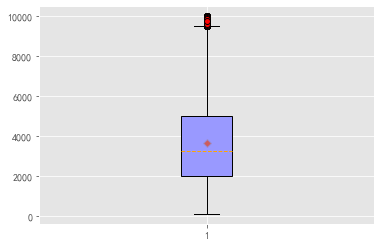

In [14]:
# 借款金额集中分布在2000-4500之间，产品应是以小额现金贷和消费贷为主。
plt.style.use('ggplot')
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#plt.rcParams['axes.unicode_minus'] = False
plt.boxplot(x = loan_LC.loc[loan['借款金额'] <10000, '借款金额'], 
            patch_artist = True, 
            showmeans = True, 
            boxprops = {'color': 'black', 'facecolor': '#9999ff'}, 
            flierprops = {'marker': 'o', 'markerfacecolor': 'red', 'color': 'black'}, 
            meanprops = {'marker': 'D', 'markerfacecolor': 'indianred'}, 
            medianprops = {'linestyle': '--', 'color': 'orange'})

plt.show()

In [15]:
loan_default = loan[loan['target'] == 1]
loan_default.head()

,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,...,已还期数,本笔已逾期次数,剩余未还本金,剩余未还利息,还款状态,逾期天数,历史逾期还款占比,年龄段,借款期限段,target
ListingId,,,,,,,,,,,,,,,,,,,,,
528911,11000,12,20.0,68.0,C,其他,否,47,男,成功认证,...,6.0,6,5772.54,341.28,1,479.0,7.41,"(45, 50]","(9, 12]",1
1537391,5161,12,24.0,1.0,F,普通,否,35,男,成功认证,...,7.0,11,2196.74,139.85,4,487.0,34.62,"(30, 35]","(9, 12]",1
1538211,3000,12,20.0,3.0,D,普通,否,23,女,未成功认证,...,8.0,6,1066.80,44.80,2,485.0,0.00,"(20, 25]","(9, 12]",1
1541761,10000,12,20.0,3.0,D,普通,否,29,男,成功认证,...,10.0,9,1807.39,45.29,2,424.0,28.57,"(25, 30]","(9, 12]",1
1573151,5298,12,24.0,0.0,D,普通,否,27,男,成功认证,...,4.0,11,3669.91,337.85,2,610.0,0.00,"(25, 30]","(9, 12]",1


,借款期限段,不良金额,不良笔数,笔均,不良金额占比,不良笔数占比
0,"(0, 3]",166493,133,1251,0.01,0.04
1,"(3, 6]",6673093,1385,4818,0.46,0.42
2,"(6, 9]",990339,225,4401,0.07,0.07
3,"(9, 12]",22714808,5249,4327,1.56,1.60
4,"(12, 15]",32215,7,4602,0.00,0.00
5,"(15, 18]",1221004,79,15455,0.08,0.02
6,"(18, 21]",183600,3,61200,0.01,0.00
7,"(21, 24]",1301743,32,40679,0.09,0.01


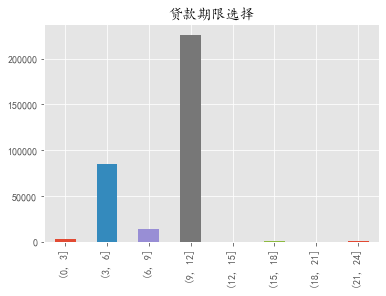

In [16]:
loan['借款期限段'].value_counts().sort_index().plot('bar', title=u'贷款期限选择')
default_on_period = loan_default.groupby('借款期限段')[['借款金额', 'target']].sum().reset_index()
default_on_period.rename(columns={'借款金额': '不良金额', 'target': '不良笔数'}, inplace=True)
default_on_period['笔均'] = (default_on_period['不良金额']/default_on_period['不良笔数']).astype('int')
default_on_period['不良金额占比'] = (100 * default_on_period['不良金额'].values/loan['借款金额'].sum()).round(2)
default_on_period['不良笔数占比'] = (100 * default_on_period['不良笔数'].values/len(loan)).round(2)
default_on_period

In [17]:
# 借款利率主要是20%和22%， 占比超80%
interest_rate_pct = (100*loan['借款利率'].value_counts()/len(loan)).round(2).reset_index()
interest_rate_pct.rename(columns={'index': '借款利率', '借款利率': '%利率'}, inplace=True)
interest_rate_pct.head()

,借款利率,%利率
0,22.0,41.97
1,20.0,38.45
2,18.0,11.80
3,24.0,3.68
4,16.0,3.21


,初始评级,不良金额,不良笔数,笔均,不良金额占比,不良笔数占比
0,A,1661460,145,11458,0.11,0.04
1,B,5013921,582,8614,0.34,0.18
2,C,8807435,2010,4381,0.61,0.61
3,D,14048484,3339,4207,0.97,1.02
4,E,3397739,928,3661,0.23,0.28
5,F,354256,109,3250,0.02,0.03


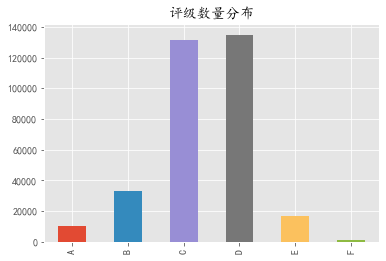

In [18]:
loan['初始评级'].value_counts().sort_index().plot('bar', title='评级数量分布')
default_on_rating = loan_default.groupby('初始评级')[['借款金额', 'target']].sum().reset_index()
default_on_rating.rename(columns={'借款金额': '不良金额', 'target': '不良笔数'}, inplace=True)
default_on_rating['笔均'] = (default_on_rating['不良金额']/default_on_rating['不良笔数']).astype('int')
default_on_rating['不良金额占比'] = (100 * default_on_rating['不良金额'].values/loan['借款金额'].sum()).round(2)
default_on_rating['不良笔数占比'] = (100 * default_on_rating['不良笔数'].values/len(loan)).round(2)
default_on_rating

,年龄段,不良金额,不良笔数,笔均,不良金额占比,不良笔数占比
0,"(15, 20]",624615,295,2117,0.04,0.09
1,"(20, 25]",7389228,1805,4093,0.51,0.55
2,"(25, 30]",10372128,2255,4599,0.71,0.69
3,"(30, 35]",7373052,1339,5506,0.51,0.41
4,"(35, 40]",4122925,701,5881,0.28,0.21
5,"(40, 45]",2101571,453,4639,0.14,0.14
6,"(45, 50]",1059405,215,4927,0.07,0.07
7,"(50, 60]",240371,50,4807,0.02,0.02


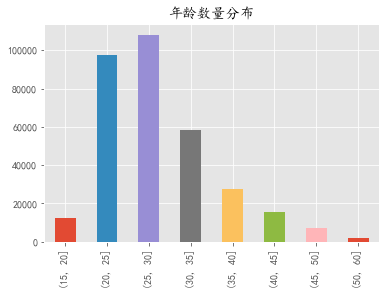

In [19]:
loan['年龄段'].value_counts().sort_index().plot('bar', title='年龄数量分布')
default_on_age = loan_default.groupby('年龄段')[['借款金额', 'target']].sum().reset_index()
default_on_age.rename(columns={'借款金额': '不良金额', 'target': '不良笔数'}, inplace=True)
default_on_age['笔均'] = (default_on_age['不良金额']/default_on_age['不良笔数']).astype('int')
default_on_age['不良金额占比'] = (100 * default_on_age['不良金额'].values/loan['借款金额'].sum()).round(2)
default_on_age['不良笔数占比'] = (100 * default_on_age['不良笔数'].values/len(loan)).round(2)
default_on_age

In [20]:
# 离散特征的编码处理
# le 遍历所有列，值（字符）<=2类的 转换成数字标识这类就是，如：男女 vs 0-1，数字不转
le = LabelEncoder()
for col in loan:
    if loan[col].dtype == 'object':
        if len(list(loan[col].unique())) <= 2:
            le.fit(loan[col])
            loan[col] = le.transform(loan[col])
# 某个列的值（字符串）内容多于2类的 get_dummies,把字符值抽出来成列，数字不能转
loan = pd.get_dummies(loan)
loan.head().T

ListingId,126541,133291,142421,149711,152141
借款金额,18000.00,9453.00,27000.00,25000.00,20000.00
借款期限,12.00,12.00,24.00,12.00,6.00
借款利率,18.00,20.00,20.00,18.00,16.00
借款成功日期,123.00,74.00,481.00,88.00,21.00
是否首标,0.00,0.00,0.00,0.00,0.00
年龄,35.00,34.00,41.00,34.00,24.00
性别,1.00,1.00,1.00,1.00,1.00
手机认证,0.00,1.00,0.00,0.00,0.00
户口认证,1.00,0.00,1.00,0.00,0.00
视频认证,0.00,1.00,1.00,0.00,0.00


In [21]:
# 本次计算现将贷后数据加入计算，后期会剔除贷后特征再建模。
# data.corr() 相关系数矩阵，即给出了任意两个变量之间的相关系数
corrs = loan.corr()
corrs['target'].sort_values()

借款成功日期           -0.152938
已还期数             -0.078545
手机认证             -0.040921
历史正常还款期数         -0.036805
初始评级_C           -0.035903
历史成功借款次数         -0.034949
借款类型_APP闪电       -0.024635
借款期限段_(3, 6]     -0.021420
视频认证             -0.021180
总待还本金            -0.018559
户口认证             -0.015411
年龄段_(20, 25]     -0.014128
征信认证             -0.012294
历史成功借款金额         -0.011320
初始评级_B           -0.009473
初始评级_A           -0.009325
借款期限段_(6, 9]     -0.007809
历史逾期还款期数         -0.003835
年龄段_(25, 30]     -0.003807
借款类型_其他          -0.002040
淘宝认证             -0.001083
借款类型_电商           0.001049
年龄段_(50, 60]      0.002781
年龄段_(15, 20]      0.003043
借款金额              0.003386
年龄段_(30, 35]      0.003965
历史逾期还款占比          0.006922
年龄段_(35, 40]      0.008179
年龄段_(45, 50]      0.008307
借款期限段_(21, 24]    0.008674
年龄段_(40, 45]      0.011614
借款期限段_(12, 15]    0.013627
借款期限段_(9, 12]     0.015934
借款期限段_(0, 3]      0.016180
初始评级_D            0.017828
年龄                0.019459
借款期限段_(18, 21]    0.020313
借

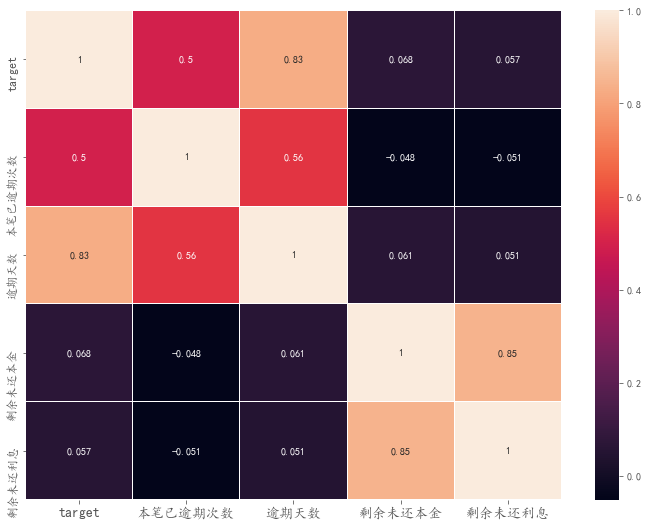

In [22]:
# 根据上面的与target 相关性结果，核实目标相关性较高的特征之间是否存在共线性。
ext_loan = loan[[u'target', u'本笔已逾期次数', u'逾期天数', u'剩余未还本金', u'剩余未还利息']]
# 原文 plt.figure(figsize=(8, 6))
# 原文 sns.heatmap(ext_loan.corr(), annot=True)

f, ax= plt.subplots(figsize = (12, 9))
sns.heatmap(ext_loan.corr(), linewidths = 0.05, ax = ax, annot = True)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(axis='x',labelsize=14)

In [23]:
""" 
target数据来源于逾期天数，故相关性较高，需剔除
本笔已逾期次数与逾期天数非强相关，剩余未还本金与剩余未还利息与逾期天数以及本笔已逾期次数相关性不高，故保留
""" 
del loan['逾期天数']

In [24]:
loan_copy = loan.copy()
del loan_copy['历史逾期还款期数']
del loan_copy['淘宝认证']
del loan_copy['借款金额']
del loan_copy['历史逾期还款占比']

In [25]:
# 自学研究
X, y = loan_copy.loc[:, loan_copy.columns != 'target'], loan_copy['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
#使用fit方法，StandardScaler对训练集中的每一维度特征计算出平均值 和 标准差


In [26]:
X_train.head(10).T

ListingId,2143711,2855601,29794471,8152091,30114711,28590651,21639911,7266011,30378261,9942521
借款期限,12.0,6.00,12.00,12.0,12.00,12.00,6.00,12.0,12.00,12.00
借款利率,14.0,18.00,22.00,24.0,22.00,22.00,20.00,22.0,22.00,22.00
借款成功日期,99.0,174.00,734.00,399.0,736.00,722.00,646.00,374.0,739.00,450.00
是否首标,1.0,0.00,0.00,1.0,1.00,0.00,0.00,1.0,0.00,0.00
年龄,30.0,24.00,25.00,33.0,33.00,21.00,20.00,29.0,28.00,31.00
性别,1.0,1.00,1.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00
手机认证,1.0,0.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,0.00
户口认证,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00
视频认证,1.0,0.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00
学历认证,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00


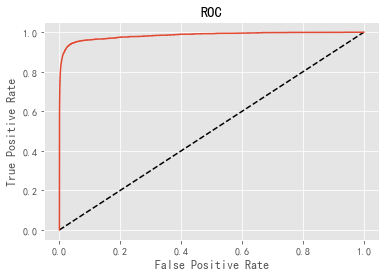

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# 含混矩阵
################## 8 预测值 2 ##############   
#真 4   3 TP（真阳）  |   1 FN（假阴）
#实--------------------------------
#值 6   5 FP（假阳）  |   1 TN（真阴）
############################################

precision = TP / (TP + FP)   # 精准率：预测为真正确数 与 预测为真总数 的比例

recall = TP / (TP + FN)      # 召回率：预测为真正确数 与 实际为真总数 的比例

accuracy = (TP + TN) / (P + N)  #准确率

F1-score = 2 / [(1 / precision) + (1 / recall)]

AUC的一般判断标准：

0.5 - 0.7：效果较低，但用于预测股票已经很不错了

0.7 - 0.85：效果一般

0.85 - 0.95：效果很好

0.95 - 1：效果非常好，但一般不太可能

# 逻辑斯蒂回归

In [28]:
def modelfit1(alg, df, performCV=True, printFeatureImportance=True, cv_folds=5):
    X, y = df.loc[:, df.columns != 'target'], df['target']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    alg.fit(x_train, y_train)
    
    #使用fit方法，StandardScaler对训练集中的每一维度特征计算出平均值 和 标准差
    sc = StandardScaler()
    sc.fit(X_train)             
    #对数据集进行标准化
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    # 返回预测标签 
    df_prediction = alg.predict(X_test_std)
    # 返回预测属于某标签的概率 
    df_predprob = alg.predict_proba(X_test_std)[:, 1]
    
    if performCV:
        cv_score = cross_val_score(alg, X_train_std, y_train, cv=cv_folds, scoring='roc_auc')
    

    print('\nModel Report')
    print('Accuracy : %.4g' % accuracy_score(y_test, df_prediction))
    print('Precision : %.4g' % precision_score(y_test, df_prediction))   
    print('Recall : %.4g' % recall_score(y_test, df_prediction))         
    print('Roc-Auc Score (train) : %f' % roc_auc_score(y_test, df_predprob))
    
    if performCV:
        print('CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g' % (np.mean(cv_score), 
                np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_train_std.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importances Score')

In [29]:
for i, C in enumerate(( 0.01, 1, 10, 100)):
    print('\nC = {} -->'.format(C))
    #modelfit(LogisticRegression(C=C, penalty='l1',  class_weight='balanced'), loan_copy, printFeatureImportance=False)
    #modelfit1(LogisticRegression(C=C, penalty='l2',  class_weight='balanced'), loan_copy, printFeatureImportance=False)


C = 0.01 -->

C = 1 -->

C = 10 -->

C = 100 -->


In [30]:
def modelfit(alg, df, performCV=True, printFeatureImportance=True, cv_folds=5):
    X, y = df.loc[:, df.columns != 'target'], df['target']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    alg.fit(x_train, y_train)
    
    df_prediction = alg.predict(x_test)
    df_predprob = alg.predict_proba(x_test)[:, 1]  #是取二维数组中第二维的所有数据, [1:100,...] =  前100行所有列 
        
    if performCV:
        cv_score = cross_val_score(alg, x_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    print('\nModel Report')
    print('Accuracy : %.4g' % accuracy_score(y_test, df_prediction))
    print('Precision : %.4g' % precision_score(y_test, df_prediction))
    print('Recall : %.4g' % recall_score(y_test, df_prediction))
    print('AUC Score (train) : %f' % roc_auc_score(y_test, df_predprob))
    
    if performCV:
        print('CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g' % (np.mean(cv_score), 
                np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, x_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importances Score')


Model Report
Accuracy : 0.9966
Precision : 0.9796
Recall : 0.8621
AUC Score (train) : 0.989459
CV Score : Mean - 0.9900689 | Std - 0.001675155 | Min - 0.9876969 | Max - 0.9923643


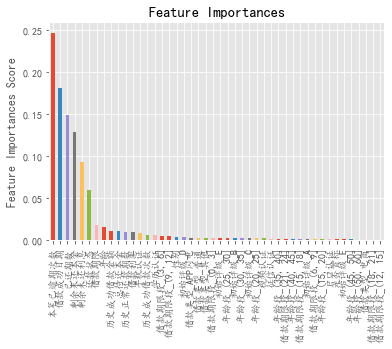

In [31]:
# 样本量相对于特征数较多，随机森林模型的泛化能力优于逻辑回归模型。
rf = RandomForestClassifier(random_state=4)
modelfit(rf, loan_copy)

# 梯度下降算法  网格调参

In [32]:
# GBDT模型的精度比RF稍差，正确率稍高，召回率优势明显，整体表现优于RF模型，泛化能力更是好于LR模型。
#modelfit(GradientBoostingClassifier(random_state=10), loan_copy)

In [33]:
# GBDT模型调参。先确定n_estimators，20-80，若小于20，需调低learning_rate, 若大于80，需调高，其他正常。 cv=5 五次交叉迭代
from sklearn.ensemble import GradientBoostingClassifier

learning_rate = [0.01, 0.2] #学习率
n_estimators = range(20,81,10)
param_test1 = dict(learning_rate = learning_rate , n_estimators = n_estimators)#转化为字典格式，网络搜索要求
#param_test1 = {'n_estimators':range(20,81,20)}
             
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(  min_samples_split=1000,    #learning_rate=0.2,
                                    min_samples_leaf=50, max_depth=8, 
                                    max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid=param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.2, 'n_estimators': 80}, 0.9989431697790996)

In [34]:
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
#这里输出了各种参数在使用交叉验证的时候得分的均值和方差
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("mean: %0.6f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
# 查看所有结果值
#gsearch1.cv_results_


mean: 0.997101 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 20}
mean: 0.997669 (+/-0.000) for {'learning_rate': 0.01, 'n_estimators': 30}
mean: 0.997914 (+/-0.000) for {'learning_rate': 0.01, 'n_estimators': 40}
mean: 0.998069 (+/-0.000) for {'learning_rate': 0.01, 'n_estimators': 50}
mean: 0.998123 (+/-0.000) for {'learning_rate': 0.01, 'n_estimators': 60}
mean: 0.998214 (+/-0.000) for {'learning_rate': 0.01, 'n_estimators': 70}
mean: 0.998289 (+/-0.000) for {'learning_rate': 0.01, 'n_estimators': 80}
mean: 0.997680 (+/-0.001) for {'learning_rate': 0.2, 'n_estimators': 20}
mean: 0.998334 (+/-0.001) for {'learning_rate': 0.2, 'n_estimators': 30}
mean: 0.998675 (+/-0.001) for {'learning_rate': 0.2, 'n_estimators': 40}
mean: 0.998805 (+/-0.001) for {'learning_rate': 0.2, 'n_estimators': 50}
mean: 0.998883 (+/-0.001) for {'learning_rate': 0.2, 'n_estimators': 60}
mean: 0.998875 (+/-0.001) for {'learning_rate': 0.2, 'n_estimators': 70}
mean: 0.998943 (+/-0.001) for {'learning_rat

In [ ]:
END #########################################################################################################

In [ ]:
X, y = loan_copy.loc[:, loan_copy.columns != 'target'], loan_copy['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
def modelfit(alg, df, performCV=True, printFeatureImportance=True, cv_folds=5):
    X, y = df.loc[:, df.columns != 'target'], df['target']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    alg.fit(x_train, y_train)
    
    df_prediction = alg.predict(x_test)
    df_predprob = alg.predict_proba(x_test)[:, 1]
    
    if performCV:
        cv_score = cross_val_score(alg, x_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    print('\nModel Report')
    print('Accuracy : %.4g' % accuracy_score(y_test, df_prediction))
    print('Precision : %.4g' % precision_score(y_test, df_prediction))
    print('Recall : %.4g' % recall_score(y_test, df_prediction))
    print('AUC Score (train) : %f' % roc_auc_score(y_test, df_predprob))
    
    if performCV:
        print('CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g' % (np.mean(cv_score), 
                np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, x_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importances Score')

In [ ]:
for i, C in enumerate((1000, 100, 1, 0.01)):
    print('\nC = {} -->'.format(C))
    modelfit(LogisticRegression(C=C, penalty='l1'), loan_copy, printFeatureImportance=False)
    modelfit(LogisticRegression(C=C, penalty='l2'), loan_copy, printFeatureImportance=False)

In [ ]:
"""
常规LR数据准确率较高，精度也较高，召回率偏低，有一定程度的误拒。参数上C=100表现最好。l1惩罚因子更有效。
信贷不平衡较严重，出错代价较大，同时市场竞争剧烈，获客也较为困难。下面尝试将分类权重调整为均衡。
修改后跑出来的数据显示回收率提高较多，显示误拒的情况减少，但精度降低较多，显示更多的坏客户未识别。
整体AUC评分虽少量提升，但对贷款而言，精度更重要，模型应该选常规LR。
"""
LR1 = LogisticRegression(C=100, penalty='l1', class_weight='balanced')
modelfit(LR1, loan_copy, printFeatureImportance=False)
LR2 = LogisticRegression(C=100, penalty='l2', class_weight='balanced')
modelfit(LR2, loan_copy, printFeatureImportance=False)

In [ ]:
# 样本量相对于特征数较多，随机森林模型的泛化能力优于逻辑回归模型。
rf = RandomForestClassifier(random_state=4)
modelfit(rf, loan_copy)

In [ ]:
# GBDT模型的精度比RF稍差，正确率稍高，召回率优势明显，整体表现优于RF模型，泛化能力更是好于LR模型。
modelfit(GradientBoostingClassifier(random_state=10), loan_copy)

In [ ]:
# GBDT模型调参。先确定n_estimators，20-80，若小于20，需调低learning_rate, 若大于80，需调高，其他正常。
from sklearn.ensemble import GradientBoostingClassifier
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=1000, 
                                    min_samples_leaf=50, max_depth=8, 
                                    max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid=param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
"""
再调整max_depth和min_samples_split，节点数和最小样本数均与现有样本量有关。后者一般是样本量的0.5%-1%。
因运算花费时间较长，故步长应设置的大些，后逐步微调。前次以最高值14和1500为最优值，本次以该值为起点再次运算。
""" 
param_test2 = {'max_depth': range(14, 20, 2), 'min_samples_split': range(1500, 2101, 200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=80, learning_rate=0.2, min_samples_leaf=50,  
                                    max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid=param_test2, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch2.fit(x_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
# 剔除贷后数据后重新建模
adjust_loan = loan.copy()
del adjust_loan['已还期数']
del adjust_loan['本笔已逾期次数']
del adjust_loan['剩余未还本金']
del adjust_loan['剩余未还利息']
del adjust_loan['还款状态']

In [ ]:
adjust_loan.corr()['target'].sort_values()

In [ ]:
del adjust_loan['历史逾期还款期数']
del adjust_loan['淘宝认证']
del adjust_loan['借款金额']
del adjust_loan['历史逾期还款占比']

In [ ]:
# 剔除贷后数据后所有模型表现均下降明显，特别LR的精度
LR3 = LogisticRegression(C=100, penalty='l1')
modelfit(LR3, adjust_loan, printFeatureImportance=False)

In [ ]:
modelfit(GradientBoostingClassifier(random_state=10), adjust_loan)

In [ ]:
# 借款成功日期可能因与逾期时间有点关联，所有特征重要性高。但该特征与客户基本无关，故剔除。
del adjust_loan['借款成功日期']
LR4 = LogisticRegression(C=100, penalty='l2', class_weight='balanced')
modelfit(LR3, adjust_loan, printFeatureImportance=False)
modelfit(GradientBoostingClassifier(n_estimators=80, learning_rate=0.2, max_depth=15, min_samples_split=1500, 
                                    min_samples_leaf=50, random_state=10), adjust_loan)